In [23]:
import re
from IPython.display import display

import matplotlib.pyplot as plt
import joblib
import numpy as np
import torch
import torch.utils.data as data_utils

from lolip.models.torch_utils.archs import *
from lolip.variables import auto_var
from lolip.utils import estimate_local_lip, estimate_local_lip_v2
from params import mnistLip, cifarLip, svhnLip
from utils import params_to_dataframe

auto_var.set_logging_level(0)

In [11]:
def get_model_name(model_name, hyper=None):
    if 'adv' in model_name:
        return 'AT'
    elif 'trades6' in model_name:
        return 'TRADES(b=6)'
    elif 'trades10' in model_name:
        return 'TRADES(b=10)'
    elif 'trades' in model_name:
        return 'TRADES(b=1)'
    elif 'cure' in model_name:
        return 'CURE'
    elif 'llr' in model_name:
        return 'LLR'
    elif 'gr' in model_name:
        return 'GR'
    else:
        return 'Natural'
    
def to_latex(df):
    df = df['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip']
    return df.to_latex()

In [18]:
for name, d in df.groupby(["dataset", "arch"]):
    print(name)
    d = d[['loss', 'trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip']]
    
    print(d.to_latex(index=False,# float_format="%%.4f",
                     column_format="lcccccc"))

('fashion', 'CNN001')
\begin{tabular}{c}
\toprule
         loss &   trn\_acc &  tst\_acc &  adv\_trn\_acc &  adv\_tst\_acc &  avg\_trn\_lip &  avg\_tst\_lip \\
\midrule
      Natural &  0.999533 &   0.9263 &     0.008750 &       0.0558 &    76.034775 &    76.180283 \\
  TRADES(b=1) &  0.996783 &   0.9308 &     0.246233 &       0.2813 &    22.103630 &    21.940477 \\
  TRADES(b=6) &  0.976017 &   0.9194 &     0.503983 &       0.5260 &     8.076009 &     8.072925 \\
  TRADES(b=6) &  0.975017 &   0.9216 &     0.498300 &       0.5156 &     7.568070 &     7.581863 \\
 TRADES(b=10) &  0.963883 &   0.9130 &     0.571000 &       0.5846 &     5.593621 &     5.636191 \\
         CURE &  1.000000 &   0.9214 &     0.076683 &       0.1263 &    28.173588 &    27.971794 \\
           AT &  0.888167 &   0.8686 &     0.829900 &       0.8119 &     1.136331 &     1.133796 \\
          LLR &  0.955950 &   0.9109 &     0.435117 &       0.4444 &    12.036719 &    12.132747 \\
          LLR &  0.975550 &   0

In [13]:
_, _, grid_params, _ = mnistLip()()
df = params_to_dataframe(grid_params,
                         columns=['trn_acc', 'tst_acc', 'adv_trn_acc', 'adv_tst_acc', 'avg_trn_lip', 'avg_tst_lip', 'history'],
                         result_file_dir='./results/experiment01/',
                         logging_level=0)

df['arch'] = df['model'].apply(lambda a: a.split("-")[2])
df['loss'] = df['model'].apply(lambda a: get_model_name(a.split("-")[0]))

for name, d in df.groupby(["dataset", "arch"]):
    print(name)
    display(d)

E1230 15:04:58.740082 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'mnist', 'eps': 0.1, 'model': 'curece-tor-CNN001', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-mnist-0.1-curece-tor-CNN001-inf-0.pkl


E1230 15:04:59.165767 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'fashion', 'eps': 0.1, 'model': 'tradesce-tor-CNN001-lrem3', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-fashion-0.1-tradesce-tor-CNN001-lrem3-inf-0.pkl


E1230 15:05:00.670447 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'fashion', 'eps': 0.1, 'model': 'curece-tor-ResNet50', 'norm': 'inf', 'random_seed': 0}
E1230 15:05:00.731666 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'fashion', 'eps': 0.1, 'model': 'advce-tor-ResNet50', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-fashion-0.1-curece-tor-ResNet50-inf-0.pkl
problem with ./results/experiment01/pgd-fashion-0.1-advce-tor-ResNet50-inf-0.pkl
('fashion', 'CNN001')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,history,arch,loss
10,pgd,fashion,0.1,ce-tor-CNN001,inf,0,0.999533,0.9263,0.008750,0.0558,76.034775,76.180283,"[{'epoch': 1, 'trn_loss': 0.6656579953034719, ...",CNN001,Natural
11,pgd,fashion,0.1,tradesce-tor-CNN001,inf,0,0.996783,0.9308,0.246233,0.2813,22.103630,21.940477,"[{'epoch': 1, 'trn_loss': 0.703578668832779, '...",CNN001,TRADES(b=1)
12,pgd,fashion,0.1,trades6ce-tor-CNN001,inf,0,0.976017,0.9194,0.503983,0.5260,8.076009,8.072925,"[{'epoch': 1, 'trn_loss': 0.7347536305745442, ...",CNN001,TRADES(b=6)
13,pgd,fashion,0.1,trades6K20ce-tor-CNN001,inf,0,0.975017,0.9216,0.498300,0.5156,7.568070,7.581863,"[{'epoch': 1, 'trn_loss': 0.7420752228101094, ...",CNN001,TRADES(b=6)
14,pgd,fashion,0.1,trades10ce-tor-CNN001,inf,0,0.963883,0.9130,0.571000,0.5846,5.593621,5.636191,"[{'epoch': 1, 'trn_loss': 0.7621811085700989, ...",CNN001,TRADES(b=10)
15,pgd,fashion,0.1,curece-tor-CNN001,inf,0,1.000000,0.9214,0.076683,0.1263,28.173588,27.971794,"[{'epoch': 1, 'trn_loss': 0.6511157069206238, ...",CNN001,CURE
16,pgd,fashion,0.1,advce-tor-CNN001,inf,0,0.888167,0.8686,0.829900,0.8119,1.136331,1.133796,"[{'epoch': 1, 'trn_loss': 1.1296655715942383, ...",CNN001,AT
17,pgd,fashion,0.1,llr65ce-tor-CNN001,inf,0,0.955950,0.9109,0.435117,0.4444,12.036719,12.132747,"[{'epoch': 1, 'trn_loss': 5.315398379262288, '...",CNN001,LLR
18,pgd,fashion,0.1,llrce-tor-CNN001,inf,0,0.975550,0.9157,0.393817,0.4215,9.833105,9.933347,"[{'epoch': 1, 'trn_loss': 3.6845599964141846, ...",CNN001,LLR
19,pgd,fashion,0.1,gr4ce-tor-CNN001,inf,0,0.999633,0.9288,0.012767,0.0592,83.943481,83.509087,"[{'epoch': 1, 'trn_loss': 0.6925393321673076, ...",CNN001,GR


('fashion', 'CNN002')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,history,arch,loss
27,pgd,fashion,0.1,ce-tor-CNN002,inf,0,0.999833,0.9250,0.062883,0.1130,61.905163,62.749039,"[{'epoch': 1, 'trn_loss': 0.8356837346633276, ...",CNN002,Natural
28,pgd,fashion,0.1,trades10ce-tor-CNN002,inf,0,0.957200,0.9117,0.565500,0.5778,4.726114,4.696544,"[{'epoch': 1, 'trn_loss': 0.8993461634159088, ...",CNN002,TRADES(b=10)
29,pgd,fashion,0.1,curece-tor-CNN002,inf,0,0.989300,0.9264,0.332700,0.3665,7.889392,7.870226,"[{'epoch': 1, 'trn_loss': 0.8071293235619863, ...",CNN002,CURE
30,pgd,fashion,0.1,advce-tor-CNN002,inf,0,0.882750,0.8642,0.835517,0.8217,0.601427,0.606910,"[{'epoch': 1, 'trn_loss': 1.329429497718811, '...",CNN002,AT
31,pgd,fashion,0.1,advce-tor-CNN002-lrem3,inf,0,0.882000,0.8634,0.835733,0.8220,0.602200,0.606674,"[{'epoch': 1, 'trn_loss': 1.3295657959620157, ...",CNN002,AT
32,pgd,fashion,0.1,llrce-tor-CNN002,inf,0,0.958250,0.9176,0.531017,0.5369,3.877496,3.932195,"[{'epoch': 1, 'trn_loss': 3.996409236399333, '...",CNN002,LLR
33,pgd,fashion,0.1,gr4ce-tor-CNN002,inf,0,0.999767,0.9267,0.085733,0.1326,59.674641,59.891964,"[{'epoch': 1, 'trn_loss': 0.8360178496519725, ...",CNN002,GR


('fashion', 'ResNet50')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,history,arch,loss
34,pgd,fashion,0.1,ce-tor-ResNet50,inf,0,0.999967,0.8980,0.002983,0.0712,46.814011,48.137806,"[{'epoch': 1, 'trn_loss': 1.9325101985613504, ...",ResNet50,Natural
35,pgd,fashion,0.1,trades10ce-tor-ResNet50,inf,0,0.999700,0.8996,0.064117,0.1355,17.480631,17.497053,"[{'epoch': 1, 'trn_loss': 2.574535019747416, '...",ResNet50,TRADES(b=10)
36,pgd,fashion,0.1,llr65ce-tor-ResNet50,inf,0,0.943733,0.8897,0.261100,0.2819,8.219348,8.191925,"[{'epoch': 1, 'trn_loss': 16.72511678568522, '...",ResNet50,LLR
37,pgd,fashion,0.1,gr4ce-tor-ResNet50,inf,0,0.985850,0.8773,0.019183,0.0847,166.733063,167.201355,"[{'epoch': 1, 'trn_loss': 2.2146993715922036, ...",ResNet50,GR


('mnist', 'CNN001')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,history,arch,loss
0,pgd,mnist,0.1,ce-tor-CNN001,inf,0,1.000000,0.9920,0.408133,0.4183,24.914808,25.083706,"[{'epoch': 1, 'trn_loss': 0.4666699381828308, ...",CNN001,Natural
1,pgd,mnist,0.1,tradesce-tor-CNN001,inf,0,1.000000,0.9922,0.806650,0.8088,6.701021,6.729030,"[{'epoch': 1, 'trn_loss': 0.46601010074218113,...",CNN001,TRADES(b=1)
2,pgd,mnist,0.1,tradesce-tor-CNN001-lrem3,inf,0,0.999967,0.9928,0.778733,0.7808,6.155597,6.180091,"[{'epoch': 1, 'trn_loss': 0.4541904543995857, ...",CNN001,TRADES(b=1)
3,pgd,mnist,0.1,trades6ce-tor-CNN001,inf,0,0.999967,0.9924,0.919833,0.9062,5.737867,5.748982,"[{'epoch': 1, 'trn_loss': 0.4758203192869822, ...",CNN001,TRADES(b=6)
4,pgd,mnist,0.1,trades6K20ce-tor-CNN001,inf,0,0.999983,0.9926,0.902850,0.8871,5.639750,5.641222,"[{'epoch': 1, 'trn_loss': 0.480186371076107, '...",CNN001,TRADES(b=6)
5,pgd,mnist,0.1,trades10ce-tor-CNN001,inf,0,0.999967,0.9931,0.921550,0.9043,5.052001,5.040387,"[{'epoch': 1, 'trn_loss': 0.4963904350121816, ...",CNN001,TRADES(b=10)
6,pgd,mnist,0.1,advce-tor-CNN001,inf,0,0.999817,0.9931,0.996400,0.9670,2.771575,2.795055,"[{'epoch': 1, 'trn_loss': 0.7555228825410207, ...",CNN001,AT
7,pgd,mnist,0.1,llr65ce-tor-CNN001,inf,0,0.999400,0.9916,0.839967,0.8302,13.091495,13.002464,"[{'epoch': 1, 'trn_loss': 2.5009387490272523, ...",CNN001,LLR
8,pgd,mnist,0.1,llrce-tor-CNN001,inf,0,0.999983,0.9934,0.860450,0.8399,12.434842,12.424883,"[{'epoch': 1, 'trn_loss': 1.71617512169679, 't...",CNN001,LLR
9,pgd,mnist,0.1,gr4ce-tor-CNN001,inf,0,0.999983,0.9913,0.416417,0.4312,19.298149,19.351391,"[{'epoch': 1, 'trn_loss': 0.4542612582564354, ...",CNN001,GR


('mnist', 'CNN002')


,attack,dataset,eps,model,norm,random_seed,trn_acc,tst_acc,adv_trn_acc,adv_tst_acc,avg_trn_lip,avg_tst_lip,history,arch,loss
20,pgd,mnist,0.1,ce-tor-CNN002,inf,0,1.000000,0.9951,0.794500,0.8053,9.913164,9.871323,"[{'epoch': 1, 'trn_loss': 0.4202427828152974, ...",CNN002,Natural
21,pgd,mnist,0.1,trades10ce-tor-CNN002,inf,0,0.999967,0.9956,0.972250,0.9555,2.740302,2.781202,"[{'epoch': 1, 'trn_loss': 0.4463977325161298, ...",CNN002,TRADES(b=10)
22,pgd,mnist,0.1,curece-tor-CNN002,inf,0,1.000000,0.9949,0.982200,0.9565,2.690739,2.680557,"[{'epoch': 1, 'trn_loss': 0.3784785412569841, ...",CNN002,CURE
23,pgd,mnist,0.1,advce-tor-CNN002,inf,0,0.999817,0.9948,0.998450,0.9783,2.185941,2.200780,"[{'epoch': 1, 'trn_loss': 0.7263447569131851, ...",CNN002,AT
24,pgd,mnist,0.1,advce-tor-CNN002-lrem3,inf,0,0.999850,0.9959,0.998550,0.9765,2.160430,2.170923,"[{'epoch': 1, 'trn_loss': 0.7263448447465897, ...",CNN002,AT
25,pgd,mnist,0.1,llrce-tor-CNN002,inf,0,1.000000,0.9958,0.961800,0.9436,3.779049,3.814385,"[{'epoch': 1, 'trn_loss': 1.4441345015684763, ...",CNN002,LLR
26,pgd,mnist,0.1,gr4ce-tor-CNN002,inf,0,1.000000,0.9951,0.795383,0.8053,10.026470,10.051231,"[{'epoch': 1, 'trn_loss': 0.4164688394347827, ...",CNN002,GR


In [3]:
_, _, grid_params, _ = cifarLip()()
params_to_dataframe(grid_params, columns=['trn_acc', 'history'], result_file_dir='./results/experiment01/')

I1230 11:50:55.377544 139653776140096 auto_var.py:261] Running time: 0.004501
E1230 11:50:55.512061 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'trades6ce-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
E1230 11:50:55.573228 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'curece-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
E1230 11:50:55.633380 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'advce-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}
E1230 11:50:55.691750 139653776140096 auto_var.py:341] Error with {'attack': 'pgd', 'dataset': 'cifar10', 'eps': 0.031, 'model': 'llrce-tor-WRN_40_10', 'norm': 'inf', 'random_seed': 0}


problem with ./results/experiment01/pgd-cifar10-0.031-trades6ce-tor-WRN_40_10-inf-0.pkl
problem with ./results/experiment01/pgd-cifar10-0.031-curece-tor-WRN_40_10-inf-0.pkl
problem with ./results/experiment01/pgd-cifar10-0.031-advce-tor-WRN_40_10-inf-0.pkl
problem with ./results/experiment01/pgd-cifar10-0.031-llrce-tor-WRN_40_10-inf-0.pkl


,attack,dataset,eps,model,norm,random_seed,trn_acc,history
0,pgd,cifar10,0.031,ce-tor-WRN_40_10,inf,0,1.0,"[{'epoch': 1, 'trn_loss': 1.6571912238693238, ..."


In [3]:
_, _, grid_params, _ = svhnLip()()
params_to_dataframe(grid_params, columns=['trn_acc', 'history'], result_file_dir='./results/experiment01/')

I1230 11:46:13.055678 139809638758208 auto_var.py:261] Running time: 0.000300
I1230 11:46:13.127493 139809638758208 auto_var.py:261] Running time: 0.000038
I1230 11:46:13.186933 139809638758208 auto_var.py:261] Running time: 0.000047
I1230 11:46:13.245424 139809638758208 auto_var.py:261] Running time: 0.000068
I1230 11:46:13.302316 139809638758208 auto_var.py:261] Running time: 0.000049


ValueError: not enough values to unpack (expected 2, got 0)

In [10]:
joblib.load("./results/experiment01/pgd-cifar10-0.031-trades6ce-tor-WRN_40_10-inf-0.pkl")

ValueError: invalid literal for int() with base 10: b'laceholder, programe still runnin'

In [9]:
def get_arch(path):
    return path.split("-")[path.split("-").index('tor')+1]

def get_ds(path):
    return path.split("-")[1]

def predict_real(model, X):
    X = X.transpose(0, 3, 1, 2)
    dataset = data_utils.TensorDataset(torch.from_numpy(X).float())
    loader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False, num_workers=2)
    ret = []
    for [x] in loader:
        ret.append(model(x.to('cuda')).detach().cpu().numpy())
    return np.concatenate(ret, axis=0)

def calc_lip(model, X, Xp, top_norm, btm_norm):
    top = np.linalg.norm(predict_real(model, X)-predict_real(model, Xp), ord=top_norm, axis=1)
    down = np.linalg.norm(X.reshape(len(Xp), -1)-Xp.reshape(len(Xp), -1), ord=btm_norm, axis=1)
    return top / (down+1e-6)

def get_lip(model, X, top_norm=2, btm_norm=2, epsilon=1.0):
    lip = estimate_local_lip_v2(model, X, top_norm=top_norm, btm_norm=btm_norm, epsilon=epsilon)
    lip_ = calc_lip(model, X, lip, top_norm=top_norm, btm_norm=btm_norm)
    return lip_

class ModelWrapper():
    def __init__(self, model):
        self.model = model
    def predict_real(self, X):
        return predict_real(self.model, X)
    def predict(self, X):
        return predict_real(self.model, X).argmax(axis=1)

In [10]:
model_path = "./models/pgd-mnist-0.031-ce-tor-CNN001-inf-0.pt"
model = globals()[get_arch(model_path)](n_classes=10)
model.load_state_dict(torch.load(model_path))
model.eval()
model.cuda()

trnX, trny, tstX, tsty = auto_var.get_var_with_argument("dataset", get_ds(model_path))
lip_ = get_lip(model, trnX, btm_norm=np.inf, epsilon=0.03)
print(lip_.mean())

30.94554163004557
30.943932


In [11]:
trny

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [32]:
lip_ = get_lip(model, trnX)

0.0775341446240743


In [4]:
np.attacks.torch.projected_gradient_descent import ProjectedGradientDescent
nb_iter=10
attack_model = ProjectedGradientDescent(
    model_fn=model,
    norm=np.inf,
    eps=0.1,
    eps_iter=0.1*2/nb_iter,
    nb_iter=nb_iter,
)

adv_trnX = attack_model.perturb(trnX)
adv_tstX = attack_model.perturb(tstX)
print((ModelWrapper(model).predict(trnX) == trny).mean())
print((ModelWrapper(model).predict(adv_trnX) == trny).mean())

SyntaxError: invalid syntax (<ipython-input-4-319c90070ab9>, line 1)

In [17]:
ModelWrapper(model).predict(trnX)

array([5, 0, 4, ..., 5, 6, 8])

In [20]:
a = joblib.load("results/experiment01/pgd-fashion-0.1-advce-tor-CNN002-inf-0.pkl")

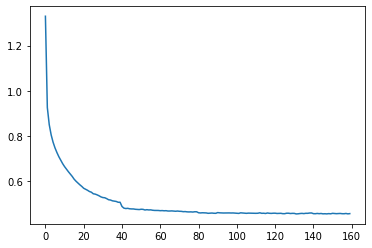

In [24]:
plt.plot([h['trn_loss'] for h in a['history']])